In [2]:
import pandas as pd
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 200
sns.set_style("whitegrid")

In [26]:
df = pd.read_csv('../datasets/challenge_dataset.csv')
cidades_importantes = pd.read_csv('../datasets/cidades.csv')

In [11]:
df

,cod_cidade,cidade,uf,loggi,dist_caj,populcao,area,malha_aerea
0,3545803,Santa Bárbara d'Oeste (SP),SP,0,NaN,191863,271.492,0
1,1600600,Santana (AP),AP,0,NaN,115438,1577.517,0
2,2910057,Dias d'Ávila (BA),BA,0,NaN,80727,207.504,0
3,4317608,Santo Antônio da Patrulha (RS),RS,0,NaN,42335,1048.904,0
4,1300300,Autazes (AM),AM,0,NaN,38460,7599.282,0
5,2909901,Curaçá (BA),BA,0,NaN,35415,6442.190,0
6,1301159,Careiro da Várzea (AM),AM,0,NaN,29197,2631.128,0
7,2608750,Lagoa Grande (PE),PE,0,NaN,25299,1852.186,0
8,1302504,Manacapuru (AM),AM,0,4000.590000,96436,7329.234,0
9,2313500,Trairi (CE),CE,0,3192.479000,55212,924.555,0


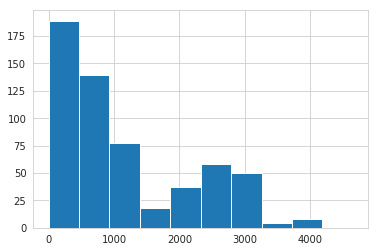

In [13]:
(df['dist_caj']).hist()

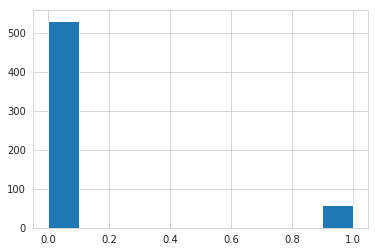

In [14]:
(df['malha_aerea']).hist()

In [75]:
df['dens_pop'] = df['populcao']/df['area']

In [17]:
df[['cidade', 'dens_pop']].sort_values(by=['dens_pop'], ascending=False)

,cidade,dens_pop
582,Taboão da Serra (SP),13658.511573
585,Diadema (SP),13632.691680
417,São João de Meriti (RJ),13213.617314
579,Carapicuíba (SP),11340.549661
581,Osasco (SP),10745.252945
587,São Caetano do Sul (SP),10389.908854
101,Olinda (PE),8971.479746
48,Fortaleza (CE),8391.598007
419,Nilópolis (RJ),8262.619408
588,São Paulo (SP),7948.729667


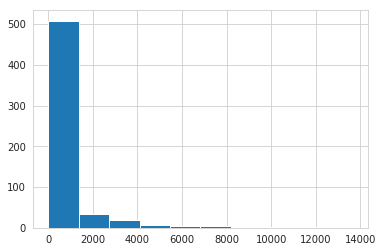

In [24]:
df['dens_pop'].hist()

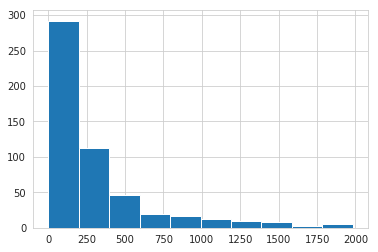

In [25]:
df[df['dens_pop'] < 2000]['dens_pop'].hist()

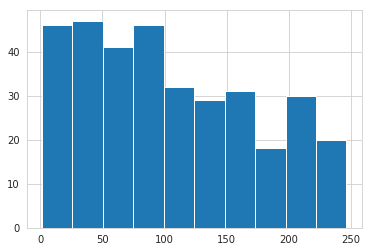

In [77]:
df[df['dens_pop'] < 250]['dens_pop'].hist()

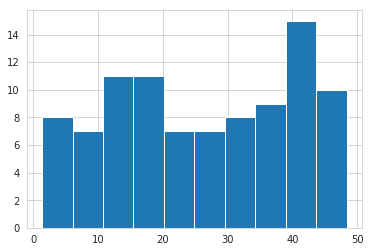

In [78]:
df[df['dens_pop'] < 50]['dens_pop'].hist()

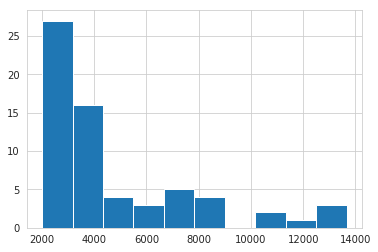

In [20]:
df[df['dens_pop'] > 2000]['dens_pop'].hist()

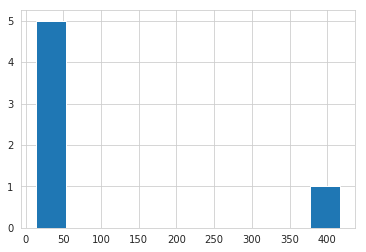

In [21]:
df[df['dens_pop'] > 10000]['dist_caj'].hist()

In [76]:
df[(df['dens_pop'] > 10000) & (df['dist_caj'] > 300)]

,cod_cidade,cidade,uf,loggi,dist_caj,populcao,area,malha_aerea,importancia,dens_pop
417,3305109,São João de Meriti (RJ),RJ,0,417.192,460336,34.838,0,0,13213.617314


In [72]:
df['importancia'] = 0
for i, cid in cidades_importantes.iterrows():
    imp = 1
    cent = cid['VAR05']
    if len(cent) > 1:
        if 'A' == cent[1]:
            imp = 3
        elif 'B' == cent[1]:
            imp = 2
    df.loc[df['cod_cidade'] == cid['Codmundv'], 'importancia'] = imp

In [73]:
df[df['importancia'] != 0]

,cod_cidade,cidade,uf,loggi,dist_caj,populcao,area,malha_aerea,importancia
17,1400100,Boa Vista (RR),RR,0,4650.000299,332025,5687.064,0,1
22,1302603,Manaus (AM),AM,1,3900.000715,2130330,11401.058,1,1
25,1303403,Parintins (AM),AM,0,3556.000000,113794,5952.333,0,2
26,1200401,Rio Branco (AC),AC,0,3526.000000,383452,9222.577,0,1
27,1600303,Macapá (AP),AP,0,3402.000000,474699,6407.123,0,1
28,1506807,Santarém (PA),PA,0,3377.000337,296159,17876.647,0,1
37,1100205,Porto Velho (RO),RO,0,3013.000203,519563,34082.366,1,2
44,2408102,Natal (RN),RN,0,2947.000900,885077,170.298,1,3
48,2304400,Fortaleza (CE),CE,1,2928.000994,2627745,313.140,1,1
58,2111300,São Luís (MA),MA,0,2905.000239,1091347,827.141,1,3


In [187]:
f = lambda a, p, m, d: a/5 + p/20000 if d<=600 else a/10*(m + 1) + p/20000

In [183]:
row_to_f = lambda row: f(row['importancia'], row['dens_pop'], row['malha_aerea'], row['dist_caj'])

In [148]:
row_to_f(df.loc[(df['cidade'] == 'Jundiaí (SP)'),:].iloc[0])

0.05688116508360554

In [188]:
df['f'] = df.apply(row_to_f, axis=1)
df

,cod_cidade,cidade,uf,loggi,dist_caj,populcao,area,malha_aerea,importancia,dens_pop,f
0,3545803,Santa Bárbara d'Oeste (SP),SP,0,NaN,191863,271.492,0,0,706.698540,0.035335
1,1600600,Santana (AP),AP,0,NaN,115438,1577.517,0,0,73.177024,0.003659
2,2910057,Dias d'Ávila (BA),BA,0,NaN,80727,207.504,0,0,389.038284,0.019452
3,4317608,Santo Antônio da Patrulha (RS),RS,0,NaN,42335,1048.904,0,0,40.361177,0.002018
4,1300300,Autazes (AM),AM,0,NaN,38460,7599.282,0,0,5.061004,0.000253
5,2909901,Curaçá (BA),BA,0,NaN,35415,6442.190,0,0,5.497354,0.000275
6,1301159,Careiro da Várzea (AM),AM,0,NaN,29197,2631.128,0,0,11.096762,0.000555
7,2608750,Lagoa Grande (PE),PE,0,NaN,25299,1852.186,0,0,13.658995,0.000683
8,1302504,Manacapuru (AM),AM,0,4000.590000,96436,7329.234,0,0,13.157719,0.000658
9,2313500,Trairi (CE),CE,0,3192.479000,55212,924.555,0,0,59.717378,0.002986


In [189]:
df[df['f'] > 0.6]

,cod_cidade,cidade,uf,loggi,dist_caj,populcao,area,malha_aerea,importancia,dens_pop,f
44,2408102,Natal (RN),RN,0,2947.000900,885077,170.298,1,3,5197.224865,0.859861
48,2304400,Fortaleza (CE),CE,1,2928.000994,2627745,313.140,1,1,8391.598007,0.619580
58,2111300,São Luís (MA),MA,0,2905.000239,1091347,827.141,1,3,1319.420752,0.665971
79,2507507,João Pessoa (PB),PB,0,2773.000992,811847,210.551,1,3,3855.821155,0.792791
92,2211001,Teresina (PI),PI,0,2686.000729,850083,1670.798,1,3,508.788615,0.625439
121,2704302,Maceió (AL),AL,0,2423.000245,1029166,510.655,1,3,2015.384163,0.700769
144,2800308,Aracaju (SE),SE,0,2168.000644,650200,174.053,1,3,3735.643741,0.786782
176,2925303,Porto Seguro (BA),BA,0,1585.000322,149410,2408.594,1,3,62.032040,0.603102
179,5103403,Cuiabá (MT),MT,0,1527.000113,589902,3538.167,1,3,166.725313,0.608336
183,5003207,Corumbá (MS),MS,0,1432.000106,109900,64960.863,1,3,1.691788,0.600085
